# 🔭Identifying spectral lines in MIRI JWST data
## Name: Soumyadip Ghosh
## Email: gsoumyadip994@gmail.com

### In this project, we will analyse the MIRI spectral cubes collected from JWST data for the source NGC 7469. We will analyse how to extract spectra from spectral cube. We will also identify emission lines from the source.

### 📡 JWST:
JWST has four main science instruments, each designed for specific types of imaging, spectroscopy, and coronagraphy across the infrared spectrum.
| Instrument     | Full Name                                                             | Primary Capabilities                                                      | Wavelength Range |
| -------------- | --------------------------------------------------------------------- | ------------------------------------------------------------------------- | ---------------- |
| **NIRCam**     | Near-Infrared Camera                                                  | Imaging, weak lensing, coronagraphy                                       | 0.6 – 5.0 µm     |
| **NIRSpec**    | Near-Infrared Spectrograph                                            | Multi-object spectroscopy, IFU, high-res spectra                          | 0.6 – 5.3 µm     |
| **MIRI**       | Mid-Infrared Instrument                                               | Mid-IR imaging, spectroscopy, coronagraphy                                | 5.0 – 28.5 µm    |
| **FGS/NIRISS** | Fine Guidance Sensor / Near-Infrared Imager and Slitless Spectrograph | Target acquisition, slitless spectroscopy, exoplanet transit observations | 0.6 – 5.0 µm     |

We will analyse data collected by MIRI for the galaxy NGC 7469.

### 💡JWST MIRI wavelength range & different channels:

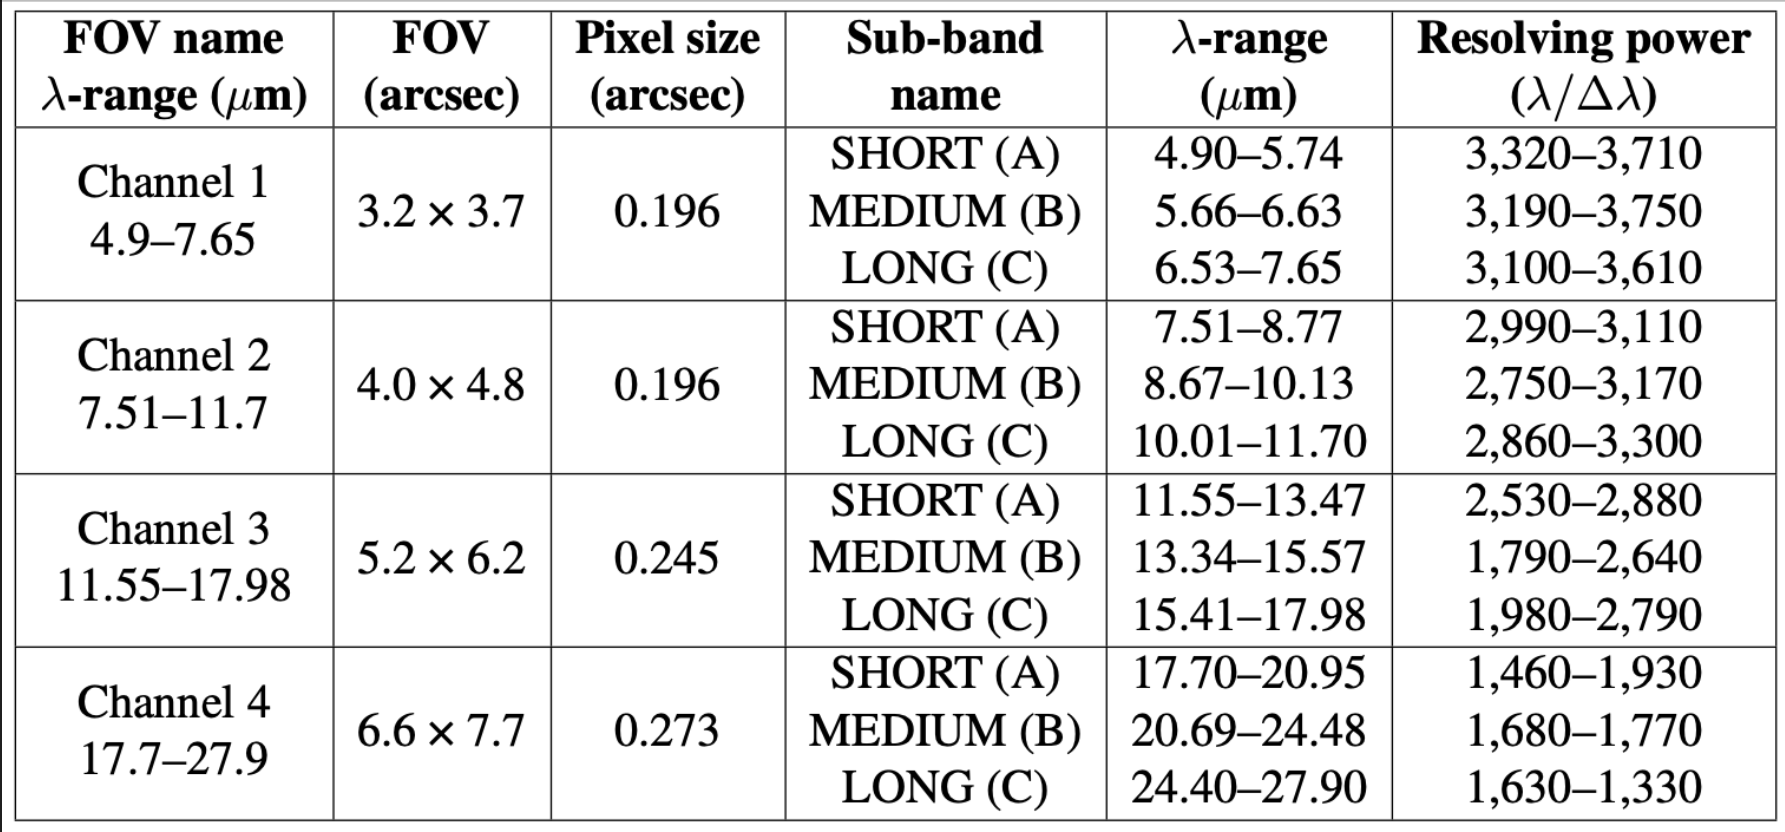

In [8]:
from IPython.display import Image, display
display(Image(filename="Screenshot 2025-06-28 015402.png", width=900)) 

### 🌌  NGC 7469:
It is a Barred Spiral Galaxy, having a central bar-shaped structure of stars. NGC 7469 is located about 200 million light-years away from Earth, which means, given its apparent dimensions, that NGC 7469 is approximately 142,000 light-years across. NGC 7469 is a type I Seyfert galaxy, characterised by its bright nucleus. It is also a luminous infrared source with a powerful starburst embedded into its circumnuclear region. It has been observed in: JWST (MIRI + NIRSpec), Spitzer IRS, ALMA, HST (UV/optical imaging), Chandra (X-ray).
| **Property**                    | **Value / Description**                                                  |
| ------------------------------- | ------------------------------------------------------------------------ |
| **Galaxy Name**                 | NGC 7469                                                                 |
| **Other Designations**          | Mrk 1514, UGC 12332, IRAS F23007+0836                                    |
| **Galaxy Type**                 | Seyfert 1 Galaxy with a Circumnuclear Starburst Ring                     |
| **Morphological Type**          | (R')SAB(rs)a (intermediate barred spiral with ring and spiral structure) |
| **Constellation**               | Pegasus                                                                  |
| **Redshift (z)**                | 0.016268                                                                 |
| **Distance**                    | 68–70 Mpc (220 million light-years)                                  |
| **Radial Velocity**             | 4874 km/s                                                              |
| **Apparent Magnitude (V)**      | 12.3                                                                     |
| **Angular Size**                | 1.3 × 1.1 arcminutes                                                   |
| **Physical Size**               | 28,000 light-years across                                              |



### ⬇️ Steps about how to download data:
First go to the MAST portal (https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html). Then go to advanced search. There, give the following input:
1. Object Name: NGC 7469
2. Observation Type: science
3. Mission: JWST
4. Instrument: MIRI/IFU
5. Product Type: cube


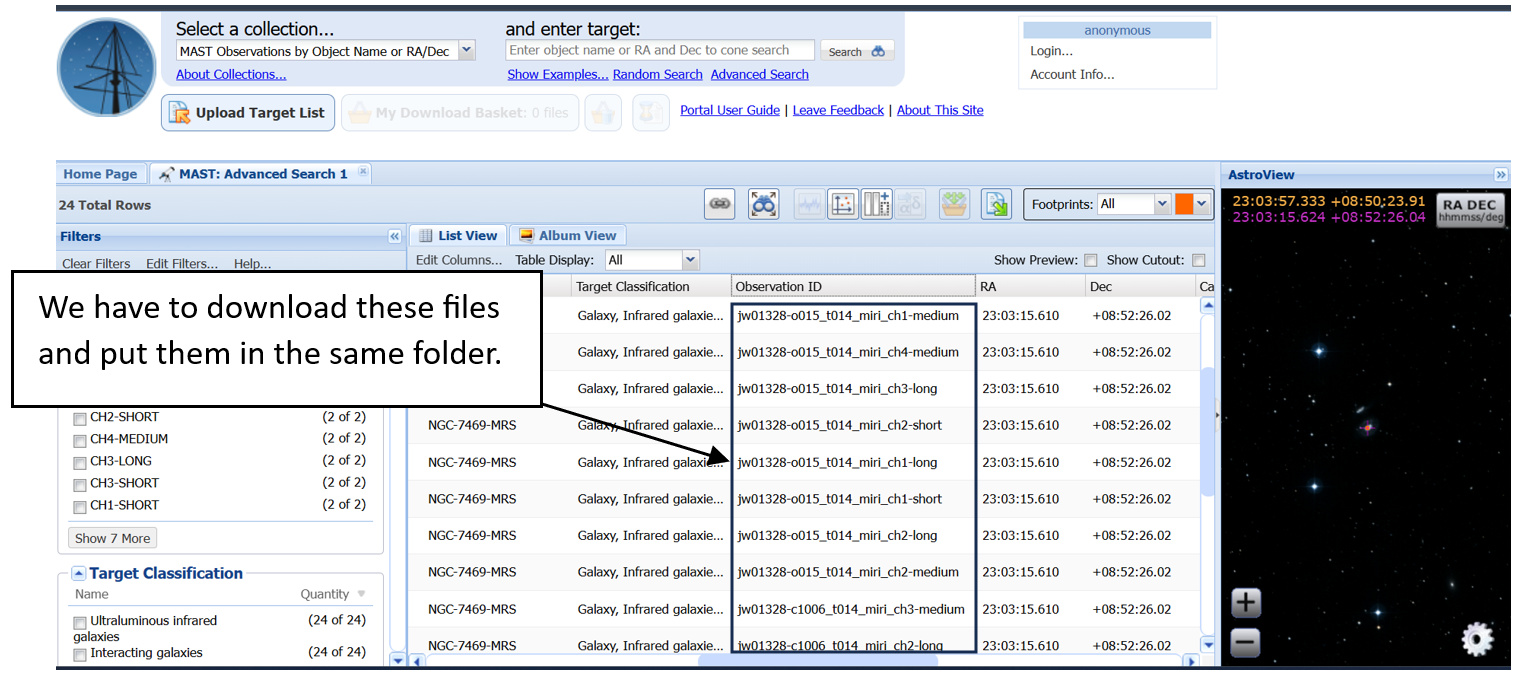

In [9]:
display(Image(filename="Screenshot 2025-06-28 023621.png", width=900))

### 🧊Spectral Cube:
A spectral cube is a three-dimensional (3D) astronomical data structure used in spectroscopy. It combines both spatial and spectral information into a single dataset, enabling detailed analysis of how light varies across position and wavelength. Unlike image that has 2 spatial axis, this has one spectral axis too. It can be in wavelength,frequency or velocity.

X-axis: spatial position (Right Ascension)  
Y-axis: spatial position (Declination)  
Z-axis: wavelength (or frequency or velocity)

JWST MIRI/MRS, NIRSpec IFU, ALMA, MUSE, and VLT SINFONI all produce spectral cubes. 

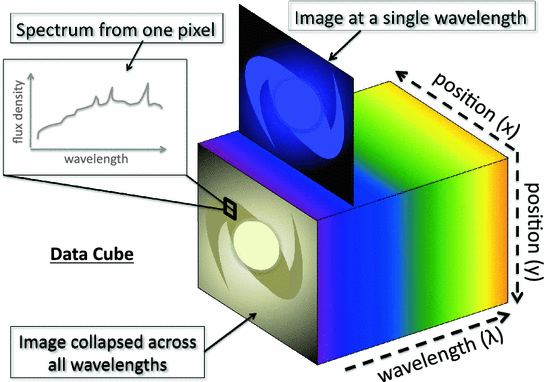

In [3]:
display(Image(filename="Data Cube.png", width=600))

### 🔬 Regions:
Regions is an in-development coordinated package of Astropy for region handling.

The Regions package provides classes to represent:

    Regions defined using pixel coordinates (e.g., CirclePixelRegion)
    Regions defined using celestial coordinates, but still in an Euclidean geometry (e.g., CircleSkyRegion)
    To transform between sky and pixel regions, a world coordinate system object (e.g., astropy.wcs.WCS) is needed.

Regions also provides a unified interface for reading, writing, parsing, and serializing regions data in different formats, including the DS9 Region Format, CRTF (CASA Region Text Format), and FITS Region Binary Table format.



Further Reference: https://astropy-regions.readthedocs.io/en/stable/shapes.html

### 🧮 DS9:
SAOImage DS9 is a widely-used astronomical imaging and data visualization tool developed by the Smithsonian Astrophysical Observatory. It is primarily used to display and analyze FITS files (Flexible Image Transport System), which is the standard format for astronomical data. It is very usefull to creat Overlays (regions, contours, catalogs, coordinate grids). It has World Coordinate System (WCS) support.  
Open the file "ch1_short" and make the regions as shown figure with radius = 0.5 arcsec. Save the region file as .reg file with format ‘ds9’ and coordinate system as 'icrs' respectively.

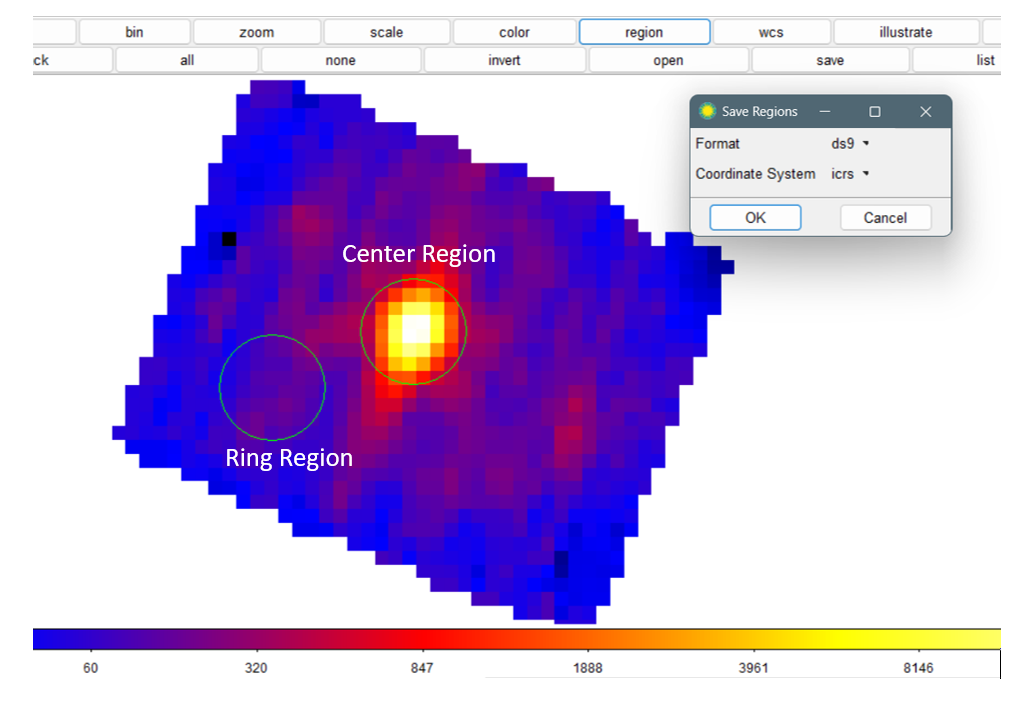

In [4]:
display(Image(filename="Screenshot 2025-06-28 025716.png", width=600))

### 📝Python Code to extract spectra from data cube:
We have selected this two regions and will iterate it over all FITS file for all 4 channels. We can proceed further and extract the spectra from each of the file and plot the final spectrum from it.

In [1]:
# Import necessary libraries
import numpy as np
import warnings
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from regions import Regions

warnings.filterwarnings("ignore", category=UserWarning, append=True)

In [2]:
# Define the redshift for NGC 7469
# NGC 7469 is a Seyfert galaxy with a redshift of approximately 0.016268
# This value is used to convert observed wavelengths to rest-frame wavelengths.
# The redshift value can be obtained from various astronomical databases like NED (NASA/IPAC Extragalactic Database).

# Redshift value 
z = 0.016268

# Region file paths
region_files = {
    "Center Region": r"F:\PROJECTS\JWST MIRI\Region\Center Region.reg",
    "Ring Region": r"F:\PROJECTS\JWST MIRI\Region\Ring Region.reg"
}
print(region_files)
# FITS cube file paths
file_paths = []
for ch_num in range(1, 5):
    for part in ['short', 'medium', 'long']:
        #file_path = fr"F:\PROJECTS\JWST FITS\jw01328-c1006_t014_miri_ch{ch_num}-{part}_s3d.fits"
        file_path = fr"F:\PROJECTS\JWST MIRI\FITS\jw01328-c1006_t014_miri_ch{ch_num}-{part}_s3d.fits"
        
        file_paths.append(file_path)

# Dictionary to store results per region
print(file_paths)
region_spectra = {}

{'Center Region': 'F:\\PROJECTS\\JWST MIRI\\Region\\Center Region.reg', 'Ring Region': 'F:\\PROJECTS\\JWST MIRI\\Region\\Ring Region.reg'}
['F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch1-short_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch1-medium_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch1-long_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch2-short_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch2-medium_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch2-long_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch3-short_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch3-medium_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch3-long_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch4-short_s3d.fits', 'F:\\PROJECTS\\JWST MIRI\\FITS\\jw01328-c1006_t014_miri_ch4-medium_s3d.fits', 'F:\\PROJECT

In [4]:
# Loop over each region
for region_name, reg_path in region_files.items():
    regions = Regions.read(reg_path, format='ds9')

    # Use two region files
    region = regions[0]

    # Initialize lists to store the spectrum and wavelength for all channels
    spectrum_all = []
    spectrum_all_err = []
    wavelength_all = []

    for file_path in file_paths:
        # Read data
        data = fits.open(file_path)[1].data      # 1 contain the 3D data cube
        data[data < 0] = np.nan                  # Reject those data having intensity less than 0, which occures for instrumental malfunction
        data_err = fits.open(file_path)[2].data  # 2 contain the error cube

        # Open the FITS file and get the WCS information to make mask of the region
        # Mask means the region of interest in the image - other parts are ignored
        header = fits.open(file_path)[1].header
        wcs = WCS(header)
        mask = region.to_pixel(wcs.celestial).to_mask()  # Convert the region from celestial to pixel coordinates then make a mask

        # Get the shape of the data
        num_channels, ny, nx = data.shape
        spectrum = []
        spectrum_err = []

        # Loop over each channel (wavelength)
        for i in range(num_channels):
            # Extract the 2D image from channels
            masked_data = np.array(mask.multiply(data[i, :, :]), dtype=float)
            masked_data_err = np.array(mask.multiply(data_err[i, :, :]), dtype=float)

            avg_intensity = np.nanmean(masked_data)
            avg_intensity_err = np.sqrt(np.nanmean(masked_data_err ** 2))

            if np.isnan(avg_intensity):
                avg_intensity = 0
            if np.isnan(avg_intensity_err):
                avg_intensity_err = 0

            spectrum.append(avg_intensity)
            spectrum_err.append(avg_intensity_err)

        # Extract the WCS information from the header to get the wavelength values
        # CRVAL3, CDELT3, and CRPIX3 are WCS keywords that define the wavelength axis

        # Wavelength axis
        crval3 = header['CRVAL3']   # CRVAL3 is the reference value of the wavelength axis
        cdelt3 = header['CDELT3']   # CDELT3 is the increment in the wavelength axis
        crpix3 = header['CRPIX3']   # CRPIX3 is the reference pixel of the wavelength axis

        wavelength = (np.arange(num_channels) - (crpix3 - 1)) * cdelt3 + crval3
        wavelength = wavelength / (1 + z) # Convert to rest-frame wavelength

        wavelength_all.extend(wavelength)
        spectrum_all.extend(spectrum)
        spectrum_all_err.extend(spectrum_err)

    # Sort all arrays by wavelength
    wavelength_all = np.array(wavelength_all)
    spectrum_all = np.array(spectrum_all)
    spectrum_all_err = np.array(spectrum_all_err)
    sort_idx = np.argsort(wavelength_all)

    region_spectra[region_name] = {
        "wavelength": wavelength_all[sort_idx],
        "spectrum": spectrum_all[sort_idx],
        "error": spectrum_all_err[sort_idx]
    }

import warnings
from astropy.wcs import FITSFixedWarning
warnings.simplefilter('ignore', category=FITSFixedWarning)

### 📈Plotting the Intensity vs Wavelength data for selected two regions:

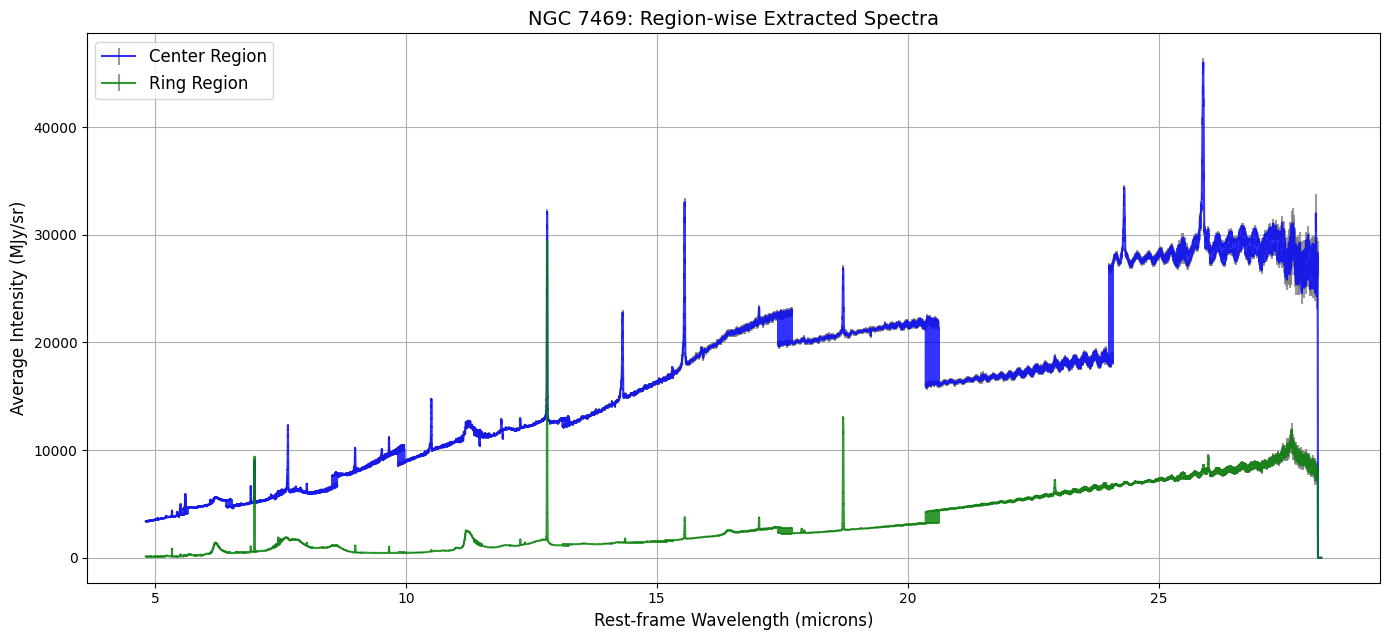

In [5]:
# PLOT COMPARATIVE SPECTRA FOR REGION 1 & 2
plt.figure(figsize=(14, 6.5))
colors = ['blue', 'green']
for idx, (region_name, data) in enumerate(region_spectra.items()):
    plt.errorbar(data["wavelength"], data["spectrum"],
                 yerr=data["error"],
                 label=region_name,
                 color=colors[idx], ecolor='gray', alpha=0.8)

plt.xlabel('Rest-frame Wavelength (microns)', fontsize=12)
plt.ylabel('Average Intensity (MJy/sr)', fontsize=12)
plt.title('NGC 7469: Region-wise Extracted Spectra', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### 🌈Identifying the spectrum:
We will now identify the peaks that appear in the above graph. These peaks indicate the abundance of different elements in the galaxy.  
We will use **Jdaviz/Cubeviz** database. We have to enter the redshift value of this galaxy and then we will check spectrum of each channel. 

Fore more Info: https://jdaviz.readthedocs.io/en/stable/cubeviz/index.html

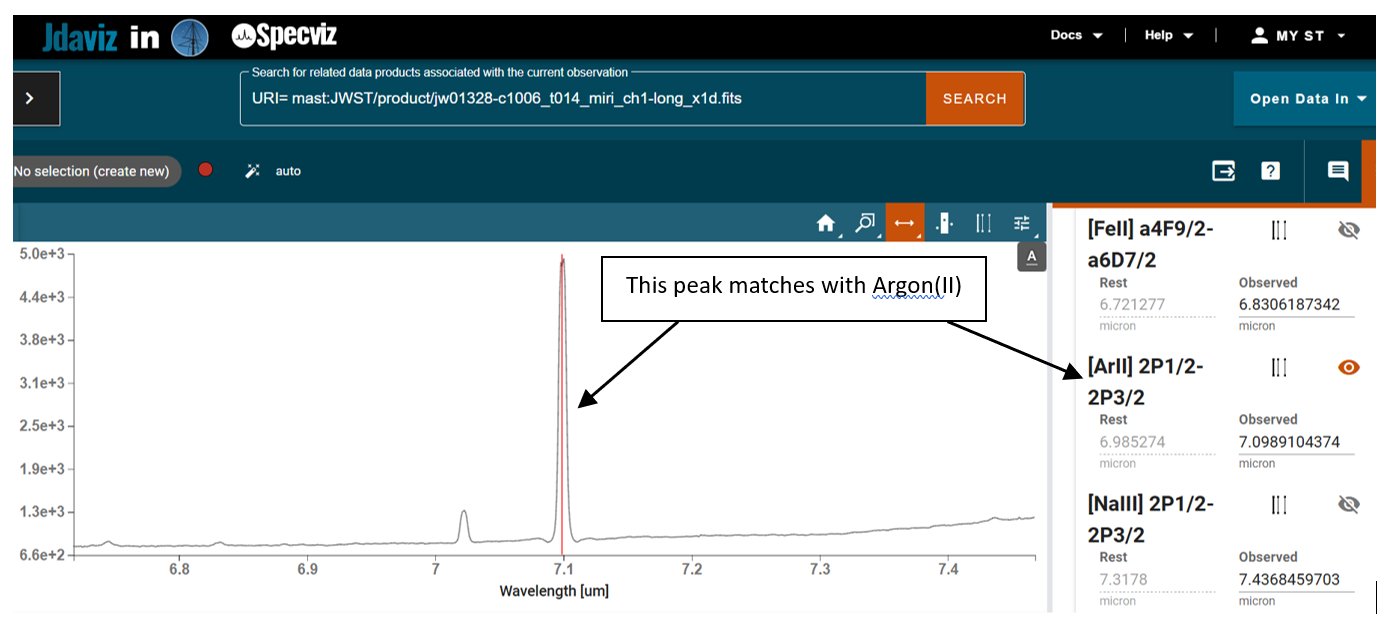

In [5]:
display(Image(filename="Screenshot 2025-06-28 211813.png", width=900))

### ✅List of observed peaks and corresponding wavengths (in microns) for each channels:

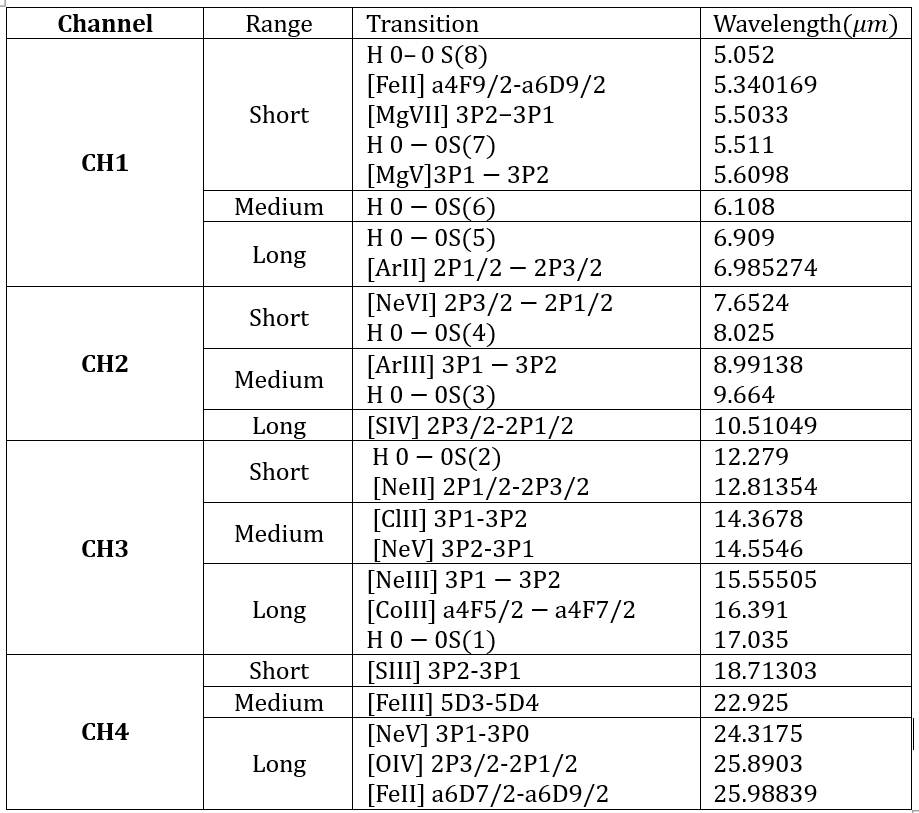

In [6]:
display(Image(filename="Screenshot 2025-06-28 222016.png", width=700))

### 📈 Plotting the spectral lines:

In [6]:
import plotly.graph_objects as go
import numpy as np

# Initialize figure
fig = go.Figure(layout=dict(
    width=1280,
    height=600,
    template='plotly_white'
))

colors = ['blue', 'green', 'orange', 'purple', 'red']  # Add more if needed

# Plot region-wise spectrum and error bands
for idx, (region_name, data) in enumerate(region_spectra.items()):
    wavelength = np.array(data["wavelength"])
    spectrum = np.array(data["spectrum"])
    error = np.array(data["error"])

    # Add spectrum line
    fig.add_trace(go.Scatter(
        x=wavelength,
        y=spectrum,
        mode='lines',
        line=dict(color=colors[idx % len(colors)], width=1.5),
        name=region_name,
        hovertemplate='λ: %{x:.3f} μm<br>Intensity: %{y:.2f} MJy/sr<extra></extra>'
    ))

    # Add uncertainty band
    fig.add_trace(go.Scatter(
        x=np.concatenate([wavelength, wavelength[::-1]]),
        y=np.concatenate([spectrum + error, (spectrum - error)[::-1]]),
        fill='toself',
        fillcolor='rgba(31, 119, 180, 0.2)' if colors[idx % len(colors)] == 'blue' else 'rgba(150, 150, 150, 0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        name=f'{region_name} Uncertainty',
        showlegend=False
    ))

# Define features
features = {
    'PAHs': {'PAH 6.2': 6.2, 'PAH 7.7': 7.7, 'PAH 8.6': 8.6, 'PAH 11.3': 11.3, 'PAH 12.7': 12.7, 'PAH 16.4': 16.4, 'PAH 17.4': 17.4,},
    'H₂': {'H₂(1)': 17.035, 'H₂(2)': 12.279, 'H₂(3)': 9.664, 'H₂(4)': 8.025, 'H₂(5)': 6.909, 'H₂(6)': 6.108, 'H₂(7)': 5.511, 'H₂(8)': 5.052 },
    'Neon': {'Ne(II)': 12.81354, 'Ne(III)': 15.55505, 'Ne(V)(3P2-3P1)': 14.32168, 'Ne(V)(3P1-3P0)': 24.3175, 'Ne(VI)': 7.6524,},
    'Iron': {'Fe(III)': 22.925, 'Fe(II)(a6D7/2-a6D9/2)': 25.98839, 'Fe(II)(a4F9/2-a6D9/2)': 5.340169,},
    'Suphur': {'S(III)': 18.71303, 'S(IV)': 10.51049,},
    'Argon': {'Ar(II)': 6.985274, 'Ar(III)': 8.99138,},
    'Magnesium': {'Mg(V)': 5.6098, 'Mg(VII)': 5.5033,},
    'Other': {'Cl(II)': 14.3678, 'O(IV)': 25.8903, 'Co(III)': 16.391,},
}

# Feature line colors
colors_features = {
    'PAHs': '#FF7F0E',
    'H₂': "#002E50",
    'Neon': "#D62728",
    'Iron': "#601303",
    'Suphur': '#E377C2',
    'Argon': "#6009B2",
    'Magnesium': '#56FF01',
    'Other': '#17BECF',
}

# Add vertical lines and annotations
for category, lines in features.items():
    for name, wl in lines.items():
        fig.add_vline(
            x=wl,
            line=dict(
                color=colors_features[category],
                width=1.5 if category == 'PAHs' else 1,
                dash='solid' if category == 'PAHs' else 'dot'
            ),
            annotation=dict(
                text=name,
                yanchor='bottom',
                font=dict(size=10, color=colors_features[category]),
                yshift=10 if category == 'PAHs' else 0
            )
        )

# Highlight PAH bands as shaded regions
for wl in [6.2, 7.7, 8.6, 11.3, 12.7, 16.4, 17.4]:
    fig.add_vrect(
        x0=wl - 0.15, x1=wl + 0.15,
        fillcolor=colors_features['PAHs'],
        opacity=0.1,
        line_width=0
    )

# Final layout
fig.update_layout(
    title='<b>NGC 7469 JWST/MIRI IFU Region-wise Spectra with Molecular and Atomic Features</b>',
    xaxis_title='<b>Wavelength (μm)</b>',
    yaxis_title='<b>Intensity (MJy/sr)</b>',
    hovermode='x unified',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    margin=dict(l=50, r=50, b=50, t=80)
)

# Show figure
fig.show()


### 💡Intensity of observed peaks for Center region and Ring region:

In [10]:
import numpy as np
import pandas as pd

# Define spectral lines of interest
features = {
    'PAHs': {'PAH 6.2': 6.2, 'PAH 7.7': 7.7, 'PAH 8.6': 8.6, 'PAH 11.3': 11.3, 'PAH 12.7': 12.7, 'PAH 16.4': 16.4, 'PAH 17.4': 17.4},
    'H₂': {'H₂(1)': 17.035, 'H₂(2)': 12.279, 'H₂(3)': 9.664, 'H₂(4)': 8.025, 'H₂(5)': 6.909, 'H₂(6)': 6.108, 'H₂(7)': 5.511, 'H₂(8)': 5.052},
    'Neon': {'Ne(II)': 12.81354, 'Ne(III)': 15.55505, 'Ne(V)(3P2-3P1)': 14.32168, 'Ne(V)(3P1-3P0)': 24.3175, 'Ne(VI)': 7.6524},
    'Iron': {'Fe(III)': 22.925, 'Fe(II)(a6D7/2-a6D9/2)': 25.98839, 'Fe(II)(a4F9/2-a6D9/2)': 5.340169},
    'Sulfur': {'S(III)': 18.71303, 'S(IV)': 10.51049},
    'Argon': {'Ar(II)': 6.985274, 'Ar(III)': 8.99138},
    'Magnesium': {'Mg(V)': 5.6098, 'Mg(VII)': 5.5033},
    'Other': {'Cl(II)': 14.3678, 'O(IV)': 25.8903, 'Co(III)': 16.391},
}

# Flatten feature list
all_lines = [(cat, name, wl) for cat, lines in features.items() for name, wl in lines.items()]

# Extract intensities separately for Center and Ring regions
region_tables = {}

for region in ['Center Region', 'Ring Region']:
    if region not in region_spectra:
        print(f"Region '{region}' not found in data.")
        continue

    data = region_spectra[region]
    wl_arr = np.array(data["wavelength"])
    flux_arr = np.array(data["spectrum"])
    err_arr = np.array(data["error"])

    # Collect rows
    rows = []
    for category, line_name, target_wl in all_lines:
        idx = np.abs(wl_arr - target_wl).argmin()
        matched_wl = wl_arr[idx]
        intensity = flux_arr[idx]
        uncertainty = err_arr[idx]

        rows.append({
            "Category": category,
            "Line": line_name,
            "Target λ (μm)": target_wl,
            "Matched λ (μm)": matched_wl,
            "Intensity (MJy/sr)": intensity,
            "Error (MJy/sr)": uncertainty
        })

    # Save table for this region
    region_tables[region] = pd.DataFrame(rows)

# Access tables like this:
center_table = region_tables["Center Region"]
ring_table = region_tables["Ring Region"]

# (Optional) Display preview
print("Center Region Sample:")
print(center_table.head(5))
print("\nRing Region Sample:")
print(ring_table.head(5))

# Export Center Region intensities to CSV
center_table.to_csv("NGC7469_CenterRegion_Intensities.csv", index=False)

# Export Ring Region intensities to CSV
ring_table.to_csv("NGC7469_RingRegion_Intensities.csv", index=False)

Center Region Sample:
  Category      Line  Target λ (μm)  Matched λ (μm)  Intensity (MJy/sr)  \
0     PAHs   PAH 6.2            6.2        6.200333         5558.678740   
1     PAHs   PAH 7.7            7.7        7.699987         6239.918955   
2     PAHs   PAH 8.6            8.6        8.599651         7862.196742   
3     PAHs  PAH 11.3           11.3       11.299726        12097.524902   
4     PAHs  PAH 12.7           12.7       12.699652        12719.077447   

   Error (MJy/sr)  
0       66.958839  
1       63.252575  
2       60.507728  
3       77.815018  
4      115.769391  

Ring Region Sample:
  Category      Line  Target λ (μm)  Matched λ (μm)  Intensity (MJy/sr)  \
0     PAHs   PAH 6.2            6.2        6.200333         1365.219747   
1     PAHs   PAH 7.7            7.7        7.699987         1637.012349   
2     PAHs   PAH 8.6            8.6        8.599651         1145.460820   
3     PAHs  PAH 11.3           11.3       11.299726         2123.961496   
4     PAHs 

### 🚀Extracting spectra to a data-frame in pandas and exporting it into a CSV file:

In [7]:
import pandas as pd
from functools import reduce

# List to collect all individual region DataFrames
df_list = []

for region_name, spec_data in region_spectra.items():
    # Build DataFrame for this region
    df = pd.DataFrame({
        "Wavelength (μm)": spec_data["wavelength"],
        f"Flux ({region_name})": spec_data["spectrum"],
        f"Error ({region_name})": spec_data["error"]
    })

    df_list.append(df)

# Merge all DataFrames on "Wavelength (μm)"
# This assumes the wavelength arrays are identical or nearly identical
df_merged = reduce(lambda left, right: pd.merge(left, right, on="Wavelength (μm)", how="outer"), df_list)

# Optional: sort by wavelength if not already
df_merged = df_merged.sort_values("Wavelength (μm)")

# Save to a single CSV
combined_csv_path = "combined_spectra_all_regions.csv"
df_merged.to_csv(combined_csv_path, index=False)

print(f"\n✅ Combined spectra saved to: {combined_csv_path}")


from IPython.display import FileLink

# Display a clickable download link
FileLink("combined_spectra_all_regions.csv")



✅ Combined spectra saved to: combined_spectra_all_regions.csv


f:\PROJECTS\JWST MIRI\combined_spectra_all_regions.csv

#### 📌 Output CSV Format Example:
| Wavelength (μm) | Flux (Central) | Error (Central) | Flux (Ring) | Error (Ring) |
| --------------- | -------------- | --------------- | ----------- | ------------ |
| 5.100           | 1.23           | 0.05            | 1.01        | 0.06         |
| 5.105           | 1.20           | 0.04            | 1.00        | 0.05         |
| ...             | ...            | ...             | ...         | ...          |


## ❔ Questions:
#### 1. What is the catagory and the subcatagory of the object?
🌀 The galaxy NGC 7469 has an active star formation and an active galactic nucleus (AGN). Type of galaxy is Seyfert Galaxy.  
Subcatagories:  
• Barred spiral galaxy  
• Circumnuclear starburst ring  
• Luminous Infrared Galaxy (LIRG)  
• Composite system: AGN + nuclear starburst  

A Seyfert galaxy is an active galaxy with a supermassive black hole at the center, has strong emission lines from ionized gas, and a bright core that can outshine the rest of the galaxy in X-ray and UV.  
#### 2. What does this category typically mean in the context of extragalactic astronomy?
🌌 In extragalactic astronomy, the category and subcategory of a galaxy provides crucial information about its structure, activity, evolution, and the physical processes occurring within it. Morphological Classification of NGC 7469 is (R')SAB(rs)a.  

SAB:---  Weakly barred spiral (bar-like structure in the core).  
R':---   Pseudo-ring formed by tightly wound spiral arms.  
rs:---   Intermediate between a full ring and spiral arms.  
a:---    Early-type spiral: large bulge, tightly wound arms.  

Interpreted as a disk galaxy with both spiral and ring features, showing signs of internal dynamics (i.e. bar-driven gas inflow). 

Circumnuclear Starburst Ring is a ring (typically ~1 kpc scale) of intense star formation encircling the galaxy nucleus. It is fed by inflowing gas, often driven by the galaxy’s bar. These rings coexist with AGN and may be linked to AGN fueling via secular processes.

#### 3. Why MIRI is important  for studying objects like NGC 7469 and helps reveal hidden structures that Optical/NIR cannot?
Mid-Infrared (MIR) imaging is critical for studying galaxies like NGC 7469, especially those with active galactic nuclei (AGN) and circumnuclear starburst regions, because it allows astronomers to penetrate dense dust clouds and reveal structures that are invisible in Optical and Near-Infrared (NIR) wavelengths.  
Optical and NIR light are strongly absorbed and scattered by dust, making many regions (like galactic centers) opaque at these wavelengths. Whereas MIRI wavelengths (5–28 microns) pass through dust, allowing astronomers to see inside dusty star-forming regions and around AGN. MIR captures thermal radiation from dust grains heated by young, massive stars or AGN. These emissions trace star formation, even when stars themselves are obscured.  
    

#### 4. After plotting the spectra for both regions, is there any vertical shift in the spectra?

When plotting intensity vs. wavelength, the entire central spectrum is vertically shifted upward compared to the ring. I have selected two regions, one at the galaxy center(AGN), 'Center Region' and one at the circumnuclear ring (star-forming ring), 'Ring Region'.  

📌 Reasons for the Vertical Shift:  
1. 🔥 Intrinsic Brightness Difference:  
AGNs produce strong thermal continuum from hot dust, heated by the AGN’s radiation field.  
The ring is primarily star-forming, emitting PAH features and molecular lines, but with a weaker MIR continuum.  
So, there is a true physical difference in brightness.  

2. 🧪 Continuum Emission vs. Line Emission  
Central regions: Strong continuum + high-ionization lines ([NeV], [OIV]).  
Ring regions: Weaker continuum, more PAH features and H₂ lines.  
Because of the stronger continuum, the central region’s spectrum appears elevated across all wavelengths.

#### 5. Why we selected these two particular regions to analyse?
The reason is to Compare two Key Physical Environments in the Galaxy, the AGN and the Circumnuclear starbrust ring. Central AGN produces hard UV/X-ray radiation high-ionization lines, warm dust continuum. Ring is rich in gas and young stars → produces PAH bands, low-ionization lines, and H₂ emission.  
#### 6. Apart from any vertical shift, is there any differences in the spectral features between these two regions? List all the differences.
| **Feature Type**          | **Spectral Feature**                                | **Difference**                                 | **Interpretation**                             |
| ------------------------- | --------------------------------------------------- | ---------------------------------------------- | ---------------------------------------------- |
| **PAH features**          | 6.2, 7.7, 8.6, 11.3 μm                              | Stronger in **ring**                           | PAHs trace **star formation**; UV-excited      |
| **High-ionization lines** | \[Ne V] 14.3, \[O IV] 25.9 μm                       | Stronger in **center**                         | Require **hard radiation**, i.e., AGN          |
| **Low-ionization lines**  | \[Ne II] 12.8, \[S III] 18.7, \[Ar II] 6.98         | Visible in both, maybe stronger in ring        | **Photoionized gas** from stars or AGN         |
| **Molecular hydrogen**    | H₂ 0-0 S(1) to S(7)                                 | Present in **both**, possibly stronger in ring | Warm **molecular gas**, UV/shocks excited      |
| **Continuum emission**    | Full MIR continuum                                  | Brighter in **center**                         | Hot dust emission from AGN                     |
| **Line widths**           | Narrow lines in ring, possible broadening in center | Possibly different                             | Could indicate **outflows or shocks** from AGN |
  
#### 7. What could be the possible physical or astrophysical reasons behind these differences?
| **Feature**                                | **Central Region (AGN)**        | **Ring Region (Starburst)**      | **Physical/Astrophysical Explanation**                                             |
| ------------------------------------------ | ------------------------------- | -------------------------------- | ---------------------------------------------------------------------------------- |
| **Continuum brightness**                   | Strong, rising continuum in MIR | Weaker continuum                 | **Hot dust** heated by AGN in the center                                           |
| **PAH features (e.g., 6.2, 7.7, 11.3 µm)** | Weaker or suppressed            | Strong and broad                 | PAHs are **destroyed by AGN radiation**, but survive in **PDRs** near young stars  |
| **\[Ne V], \[O IV], \[Ne VI] lines**       | Strong                          | Absent or very weak              | Require **very high-energy photons** — only an **AGN** produces these              |
| **\[Ne II], \[S III], \[Ar II] lines**     | Present                         | Also present, sometimes stronger | Trace **H II regions** — found in both AGN and starburst environments              |
| **H₂ rotational lines (S(1) to S(7))**     | Present, possibly weaker        | Stronger in some bands           | Excited by **UV photons**, **PDRs**, or **shocks**; strong in star-forming regions |
| **Line widths**                            | May be broader                  | Narrow                           | Central outflows or **turbulence** from AGN can **broaden** emission lines         |
| **Line ratios (\[Ne III]/\[Ne II])**       | Higher                          | Lower                            | Higher ratio = **harder radiation field** (AGN)                                    |
| **Spectral structure**                     | More atomic/narrow lines        | Mix of PAHs + atomic lines       | AGN affects gas more; star-forming regions emit broader PAH features               |



#### 8. As we move from Channel 1 to Channel 4 and towards longer wavelengths, do we notice any change in the spectral features?
Yes, as we move from (CH1) to (CH4), there are several notable trends in both the spectral features and the data quality.
| **Channel** | **Wavelength Range** | **Spectral Feature Trends**                                                                 |
| ----------- | -------------------- | ------------------------------------------------------------------------------------------- |
| **CH1**     | 5–7 μm             | - Dense clustering of lines (e.g., \[Fe II], H₂ S(7), \[Ar II])<br> - Strong PAH at 6.2 μm  |
| **CH2**     | 7–11 μm            | - Strong PAH features at 7.7, 8.6, 11.3 μm<br> - H₂ S(4), \[S IV], \[Ar III]                |
| **CH3**     | 11–18 μm           | - Fewer but strong atomic lines (e.g., \[Ne II], \[Ne III])<br> - PAHs at 11.3, 12.7 μm     |
| **CH4**     | 18–28 μm           | - Sparse features, mostly \[S III], \[O IV], \[Fe II]<br> - Broader continuum<br> - H₂ S(1) |  
  

🔍 Number of identifiable features tends to decrease with wavelength. Line spacing increases — atomic fine-structure lines are fewer in CH4. PAH emission drops off in CH4; replaced by atomic cooling lines ([OIV], [NeV]).
| **Channel** | **Trend in Noise and Errors**                                                                                                      |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **CH1–CH2** | Higher resolution, denser sampling — spectra look smoother but show more features                                                  |
| **CH3–CH4** | Errors increase slightly, especially beyond 22 μm<br> - Occasional oscillations<br> - Flux calibration edge effects may appear |   

📉 Reasons: Detector sensitivity drops toward longer MIR wavelengths. Background subtraction is harder in CH4 due to increasing thermal background. Edges of each MIRI channel can show increased uncertainties or artifacts.



#### 9. Is this change likely to be due to an instrumental effect or a real astrophysical property?  
✔️ The answer is: Both — but mostly a real astrophysical property, with some instrumental influence. These changes reflect real variations in the physical conditions (temperature, ionization, star formation vs. AGN). As well as some of the instrumententional reason as mentioned above.
